In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Lagrange interpolating polynomials

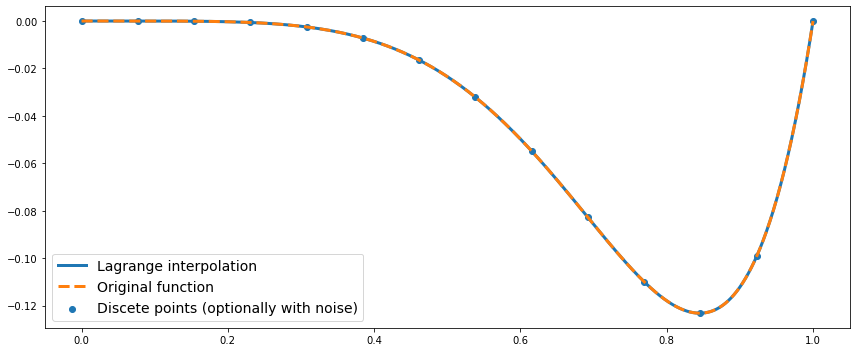

In [22]:
# Given N points (x_i, y_i), it is always possible to find a
# polynomial of degree N-1 which passes through all points 
# (provided x_i is different for all points). See for example
# https://en.wikipedia.org/wiki/Lagrange_polynomial
from scipy.interpolate import lagrange

# Number of points
N = 14
# N evenly spaced x-values
x = np.linspace(0, 1, N)
# x**2 + some Gaussian random noise (mu = 0, sigma = 0.01)
y = x**7 - x**5 # + np.random.normal(loc = 0, scale = 0.001, size = N)

# Find the polynomial that passes through all points
f = lagrange(x, y)

# Plot points and a smooth curve of the polynomial. The point
# is to illustrate that it is not necessarily a good idea
# to try to interpolate a large number of points.
fig = plt.figure(figsize = (12, 5))
plt.scatter(x, y, label = 'Discete points (optionally with noise)')
xs = np.linspace(0, 1, 1000)
plt.plot(xs, f(xs), lw = 3, label = 'Lagrange interpolation')

plt.plot(xs, xs**7 - xs**5, '--', lw = 3, label = 'Original function')
plt.legend(fontsize = 14)
plt.tight_layout()

## Linear interpolation

To linearly interpolate between a set of points, $(x_i, f(x_i)$, we simply construct straight lines goin from one point to the next. We call the linear interpolation $F_1(x)$, and it will approximate the values of $f(x)$ in between the points that are given (it will exactly reproduce the given points).

$$ F_1 (x) = f(x_i) + \big(f(x_{i+1} - f(x_i) \big) \frac{x - x_i}{x_{i+1} - x_i} \;\;\; \mathrm{for} \;\;\; x_i < x \leq x_{i+1}. $$

This results in a continuous function, but the derivatives are discontinuous on the points $x_i$.

## Example implementation of linear interpolation

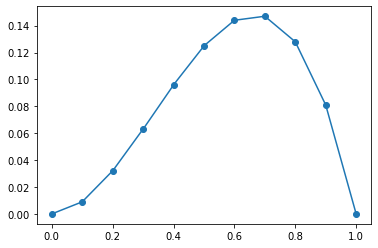

In [32]:
def linear(Xi, Yi, x):
    # Find the index of the largest Xi smaller than x
    i = np.searchsorted(Xi, x) - 1
    return Yi[i] + (Yi[i+1]-Yi[i])*(x - Xi[i])/(Xi[i+1] - Xi[i])
    
Xi = np.linspace(0, 1, 11)
Yi = Xi**2 - Xi**3

plt.scatter(Xi, Yi)
x = np.linspace(0, 1, 1001)
plt.plot(x, linear(Xi, Yi, x))

## Example using built-in features in scipy (generally recommended)

In [46]:
from scipy.interpolate import interp1d

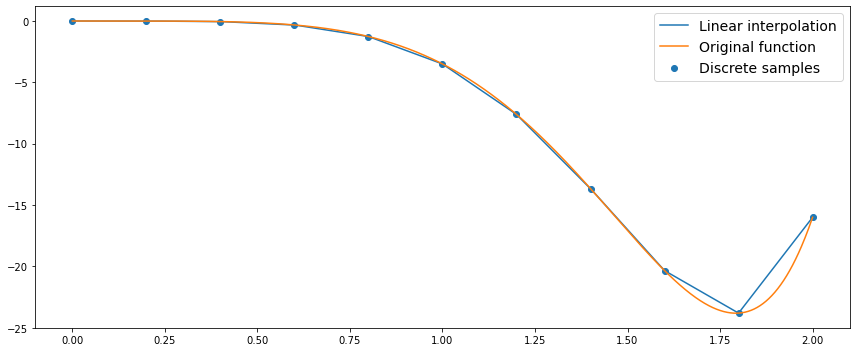

In [49]:
# Original function
def f(x):
    return x**7 - 4.5*x**5

# Create some discrete samples
Xi = np.linspace(0, 2, 11)
Yi = f(Xi)

# A call to interp1d returns a function-like object
F1 = interp1d(Xi, Yi, kind = 'linear')

# Plot the discrete points
fig = plt.figure(figsize = (12, 5))
plt.scatter(Xi, Yi, label = 'Discrete samples')

# Call the object returned by interp1d
x = np.linspace(0, 2, 1001)
plt.plot(x, F1(x), label = 'Linear interpolation')

# Plot original function
plt.plot(x, f(x), label = 'Original function')

plt.legend(fontsize = 14)
plt.tight_layout()

## Splines

Spline interpolation is similar to linear interpolation in that we connect the interval between two known points by some function (and indeed linear interpolation is one type of spline interpolation). However, we typically use higher-order polynomials. For example, a cubic spline interpolation, $F_3(x)$, might be implemented like this:

$$ F_3 (x) = a + b x' + c x'^2 + d x'^3 \;\;\; \mathrm{where} \;\;\; x' = x - x_i \;\;\; \mathrm{and} \;\;\; x_i < x \leq x_{i+1}. $$

The goal is then usually to choose the weights $a$, $b$, $c$, and $d$ in such a way that $F_3(x_i) = f(x_i)$ for all $x_i$, and additionally, that the first and second derivatives are continous across the points $x_i$, that is

$$ \lim_{\epsilon \to 0} F'_3(x_i + \epsilon)  = \lim_{\epsilon \to 0} F'_3(x_i - \epsilon), $$
$$ \lim_{\epsilon \to 0} F''_3(x_i + \epsilon)  = \lim_{\epsilon \to 0} F''_3(x_i - \epsilon), $$

where $F_3'(x)$ and $F_3''(x)$ are the first and second derivatives of $F_3(x)$.

Higher order splines follow the same general idea, but with higher order polynomials, and more continuous derivatives. In practice, cubic splines are often used, and seem to give a good compromise between accuracy and computational effort.

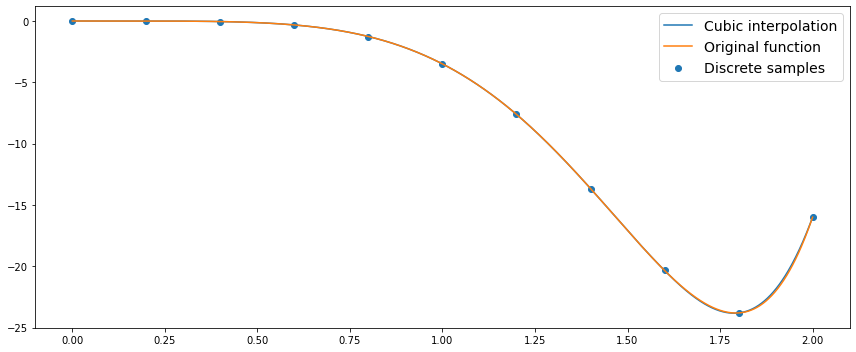

In [51]:
# Original function
def f(x):
    return x**7 - 4.5*x**5

# Create some discrete samples
Xi = np.linspace(0, 2, 11)
Yi = f(Xi)

# A call to interp1d returns a function-like object
F3 = interp1d(Xi, Yi, kind = 'cubic')


# Plot the discrete points
fig = plt.figure(figsize = (12, 5))
plt.scatter(Xi, Yi, label = 'Discrete samples')

# Call the object returned by interp1d
x = np.linspace(0, 2, 1001)
plt.plot(x, F3(x), label = 'Cubic interpolation')

# Plot original function
plt.plot(x, f(x), label = 'Original function')

plt.legend(fontsize = 14)
plt.tight_layout()